In [145]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [146]:
data = pd.read_csv('/content/drive/My Drive/機器學習作業/CSV/dermatologydata.csv',header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3


In [147]:
data.columns = ['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules', 'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 'family history', 'melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis', 'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'band-like infiltrate', 'Age', 'class']
data.head(3)

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3


##處理Age的錯誤值

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner phenomenon                        366 non-null    int64 
 5   polygonal papules                         366 non-null    int64 
 6   follicular papules                        366 non-null    int64 
 7   oral mucosal involvement                  366 non-null    int64 
 8   knee and elbow involvement                366 non-null    int64 
 9   scalp involvement                         366 non-null    int64 
 10  family history                            366 non-

In [149]:
data['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [150]:
count=0
for x in data['Age']:
  if x == '?':
    data['Age'][count] = np.nan
  count+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [151]:
data['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', nan, '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [152]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [153]:
#NaN屬於float類別
data['Age'].astype(float)

0      55.0
1       8.0
2      26.0
3      40.0
4      45.0
       ... 
361    25.0
362    36.0
363    28.0
364    50.0
365    35.0
Name: Age, Length: 366, dtype: float64

In [154]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [155]:
x = data.iloc[:].values
imputer = imputer.fit(x[:,33:34])
x[:,33:34] = imputer.transform(x[:,33:34])
data_mv = pd.DataFrame(x)

In [156]:
data_mv.columns = ['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules', 'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 'family history', 'melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis', 'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'band-like infiltrate', 'Age', 'class']
data_mv.head(3)

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3


In [157]:
data_mv['Age'].unique()

array([55.0, 8.0, 26.0, 40.0, 45.0, 41.0, 18.0, 57.0, 22.0, 30.0, 20.0,
       21.0, 10.0, 65.0, 38.0, 23.0, 17.0, 51.0, 42.0, 44.0, 33.0, 43.0,
       50.0, 34.0, 36.29608938547486, 15.0, 46.0, 62.0, 35.0, 48.0, 12.0,
       52.0, 60.0, 32.0, 19.0, 29.0, 25.0, 36.0, 13.0, 27.0, 31.0, 28.0,
       64.0, 39.0, 47.0, 16.0, 0.0, 7.0, 70.0, 37.0, 61.0, 67.0, 56.0,
       53.0, 24.0, 58.0, 49.0, 63.0, 68.0, 9.0, 75.0], dtype=object)

In [158]:
data_mv = data_mv.astype(int)

In [159]:
data_mv.isnull().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [160]:
data_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  366 non-null    int64
 1   scaling                                   366 non-null    int64
 2   definite borders                          366 non-null    int64
 3   itching                                   366 non-null    int64
 4   koebner phenomenon                        366 non-null    int64
 5   polygonal papules                         366 non-null    int64
 6   follicular papules                        366 non-null    int64
 7   oral mucosal involvement                  366 non-null    int64
 8   knee and elbow involvement                366 non-null    int64
 9   scalp involvement                         366 non-null    int64
 10  family history                            366 non-null    int6

In [161]:
data_mv.head(3)

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3


In [162]:
data_mv['class'].unique()

array([2, 1, 3, 5, 4, 6])

In [163]:
corr = data_mv.corr()

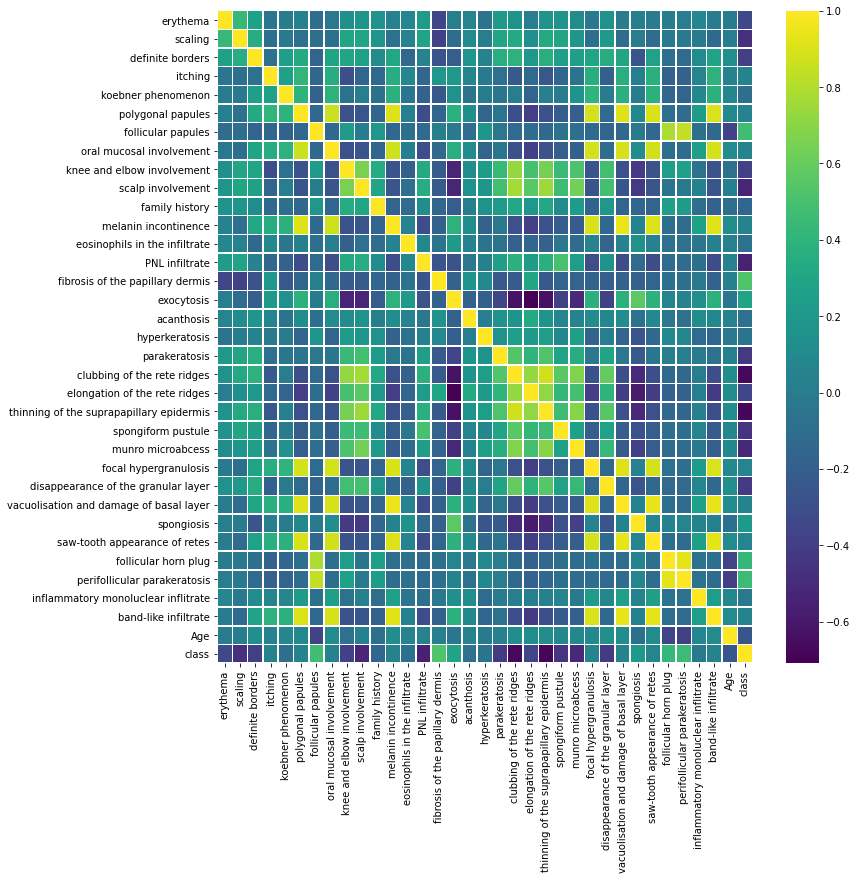

In [164]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, linewidths=.5, cmap='viridis')

##分割資料

In [165]:
Y = data_mv['class'].values
data_mv = data_mv.drop('class', 1)
X = data_mv

In [166]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

In [167]:
X_train.shape

(292, 34)

##Logistic Regression

In [168]:
log = LogisticRegression()

In [169]:
log.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
predictions = log.predict(X_test)

In [171]:
predictions

array([1, 2, 1, 4, 4, 1, 1, 1, 3, 5, 2, 3, 5, 3, 1, 1, 1, 5, 4, 6, 3, 3,
       2, 1, 2, 4, 5, 1, 1, 1, 6, 3, 5, 1, 1, 6, 6, 1, 2, 3, 1, 3, 1, 1,
       1, 1, 1, 2, 5, 4, 1, 4, 5, 4, 2, 3, 1, 4, 1, 6, 5, 1, 3, 2, 1, 3,
       1, 2, 4, 1, 2, 2, 4, 6])

In [172]:
log.score(X_test,Y_test)

0.9864864864864865

# Naive Bayes

Gaussian naive Bayes

In [173]:
from sklearn.naive_bayes import GaussianNB

In [174]:
gnb = GaussianNB()

In [175]:
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [176]:
gnb.score(X_test, Y_test)

0.8918918918918919

Percision Score

In [177]:
from sklearn.metrics import precision_score

In [178]:
from sklearn.metrics import recall_score

In [179]:
precision_score(Y_test,log.predict(X_test),pos_label='positive',average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.9864864864864865

In [180]:
recall_score(Y_test, log.predict(X_test), average='micro')

0.9864864864864865

#Logistic Regrssion v.s. GNB



In [181]:
Y_lr_score = log.predict_proba(X_test)
Y_gnb_score = gnb.predict_proba(X_test)

In [182]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [183]:
Y_scores = log.decision_function(X_test)
fpr_gnb, tpr_gnb,thresholds_gnb = roc_curve(Y_test, Y_gnb_score[:,1],pos_label=6)

In [184]:
fpr_gnb

array([0.        , 0.02941176, 0.22058824, 0.22058824, 1.        ])

In [185]:
tpr_gnb

array([0.        , 0.        , 0.        , 0.83333333, 1.        ])

In [186]:
auc(fpr_gnb,tpr_gnb)

0.7144607843137255

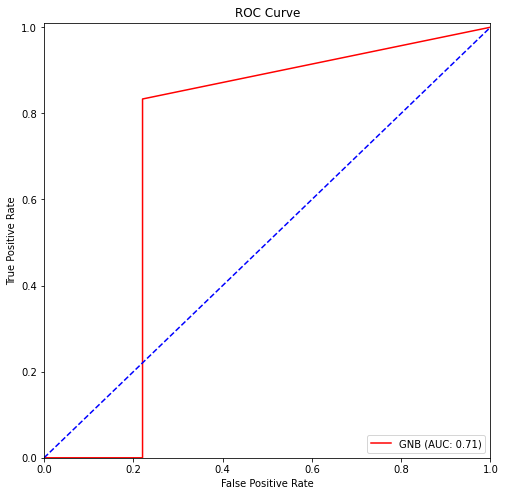

In [187]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_gnb, tpr_gnb, color='red', label='GNB (AUC: %.2f)' % auc(fpr_gnb, tpr_gnb))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [188]:
fpr_lrg, tpr_lrg,thresholds_lrg = roc_curve(Y_test, Y_lr_score[:,1],pos_label=6)

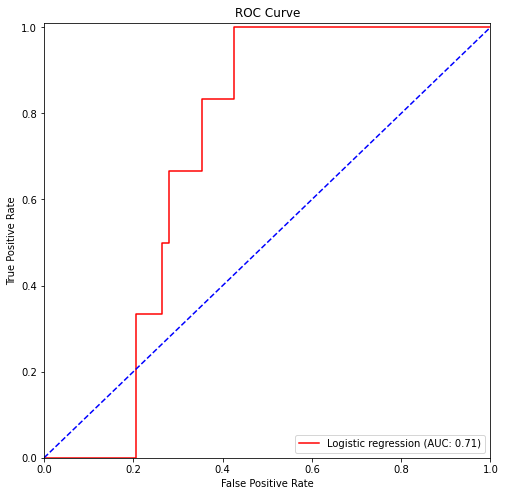

In [189]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_lrg, tpr_lrg, color='red', label='Logistic regression (AUC: %.2f)' % auc(fpr_lrg, tpr_lrg))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")